In [1]:
import math
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from IPython.display import HTML

def sense(x):
    return x

def simulate(delta_t, x, u):
    x += delta_t * u
    return x

def get_robot_path(tf, dt, start_x, start_y, control_policy):
    time = np.linspace(0.,tf, int(tf / dt) + 1)  
    x = np.array([start_x, start_y])
    x_log = [np.copy(x)]

    for t in time:
        y = sense(x)
        u = control_policy(t, y)    
        x = simulate(dt, x, u)
        x_log.append(np.copy(x))
        
    x_log = np.array(x_log)
    return x_log, time

def animate_path(path, time):
    fig, ax = plt.subplots()

    ax.set_aspect('equal', adjustable='box')

    def animate(t):
        ax.clear()
        
        # Path
        plt.plot(path[:,0], path[:,1], 'r--')
        
        # Initial conditions
        plt.plot(path[t,0], path[t,1], 'bo')
        
    return animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

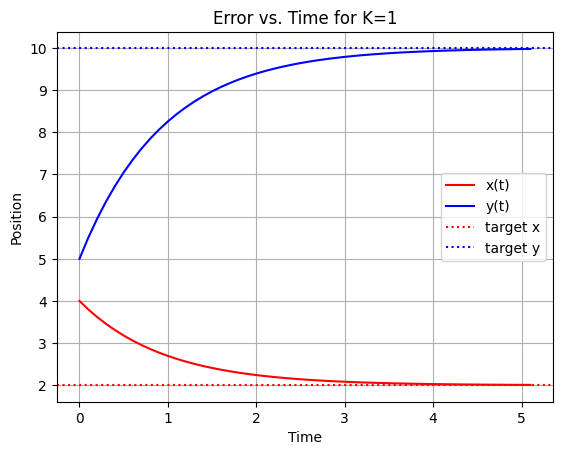

In [84]:

X_DEST = 2
Y_DEST = 10
K_VAL = 1

def control(t, y):
    """Proportional control policy"""
    x_pos = y[0]
    y_pos = y[1]

    x_error = X_DEST - x_pos
    y_error = Y_DEST - y_pos

    ux = K_VAL * x_error
    uy = K_VAL * y_error
    return np.array([ux, uy])

tf = 5
dt = 0.1   
path, time = get_robot_path(tf, dt, 4.0, 5.0, control)

# the time array has one less value than the x/y arrays, so add time element
time = time.tolist()
time.append(tf + dt)

# plot robot x and y position against time
plt.plot(time, path[:,0], color='red', label='x(t)')
plt.plot(time, path[:,1], color='blue', label='y(t)')

# plot target positions
plt.axhline(y=X_DEST, color='red', label='target x', linestyle='dotted')
plt.axhline(y=Y_DEST, color='blue', label='target y', linestyle='dotted')

plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.grid()
plt.title(f'Error vs. Time for K={K_VAL}')

plt.show()
